# 🧭 Plan C: Cash-Pay Market Segmentation via Clustering

In this notebook, we apply **unsupervised machine learning (K-Means clustering)** to segment U.S. states based on three key market indicators:
- `Num_Records`: the number of recorded cash-based healthcare payments (volume)
- `Total_Payment`: the aggregate dollar flow (scale)
- `Avg_Payment`: the average transaction size (value per visit)

Instead of assigning a single "hotness score" like in Plans A and B, **Plan C identifies clusters of states with similar market behavior**. This enables **Healium to deploy differentiated go-to-market strategies** tailored to:

- 🟢 Boutique, high-value regions
- 🔵 High-volume, structurally active markets
- 🔴 Outlier-driven, premium spike zones

---

### 📊 Method Summary:
- Normalize inputs to avoid scale dominance
- Use K-Means clustering with `k=3` (aligned with business strategy)
- Visualize state distribution via scatter plots and U.S. heatmaps
- Interpret clusters with real-world examples (e.g. MN, AZ, CO)

---

### 🧠 Why Clustering Matters:
Traditional scoring may overlook **multi-dimensional market structures**. This approach reveals **behavioral groupings** that are more aligned with:
- **Product-market fit**
- **Pilot region selection**
- **Ad spend allocation across ROI tiers**

> The goal of Plan C is **not just to rank**, but to **understand**.
It helps Healium **segment markets with surgical precision** and avoid one-size-fits-all assumptions.

## Code Implementation

### 🟦 Step 1: Import Libraries and Load Dataset

We begin by importing the required Python libraries and loading the cleaned dataset from previous plans.  
This dataset contains state-level metrics including transaction volume (`Num_Records`), total payments (`Total_Payment`), and average transaction value (`Avg_Payment`) — all of which will be used to build meaningful clusters of healthcare markets.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Plan A/B combined dataset
df = pd.read_csv("/content/sample_data/state_agg.csv")  # Adjust path if needed
df.head()

,State,Num_Records,Total_Payment
0,AK,8,5754.81
1,AL,39,66749.89
2,AR,5,2609.45
3,AZ,300,6555135.84
4,CA,450,557042.90


### 🟦 Step 2: Prepare Features for Clustering

Before clustering, we compute the missing `Avg_Payment` field by dividing `Total_Payment` by `Num_Records`.  
We then select three core features that describe state-level market behavior:
- `Num_Records`: activity volume
- `Total_Payment`: economic scale
- `Avg_Payment`: value per transaction (calculated)

These features form the basis for clustering distinct market types.

In [ ]:
# Calculate Avg_Payment if not present
if "Avg_Payment" not in df.columns:
    df["Avg_Payment"] = df["Total_Payment"] / df["Num_Records"]

# Select the features
features = ["Num_Records", "Total_Payment", "Avg_Payment"]
X = df[features].copy()
X.head()

,Num_Records,Total_Payment,Avg_Payment
0,8,5754.81,719.351250
1,39,66749.89,1711.535641
2,5,2609.45,521.890000
3,300,6555135.84,21850.452800
4,450,557042.90,1237.873111


### 🟦 Step 3: Normalize the Feature Space

To ensure fair contribution of each feature to the clustering model, we apply **standardization** (zero mean, unit variance) to:
- Eliminate scale bias
- Prepare data for KMeans clustering

This step ensures that no single variable (like `Total_Payment`) dominates due to scale.

In [ ]:
# Apply StandardScaler to normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🟦 Step 4: Determine Optimal Number of Clusters (Elbow Method)

We apply the **Elbow Method** to identify the optimal number of clusters.  
By plotting the inertia (within-cluster sum of squares) for different values of `k`, we look for the "elbow point" — where adding more clusters yields diminishing returns.

While the elbow method offers guidance, in this project we fix **k = 3** based on predefined business segmentation goals:

- Cluster 0: High-Value Boutique Markets
- Cluster 1: High-Volume Broad Markets
- Cluster 2: Volatile or Outlier-Driven Markets

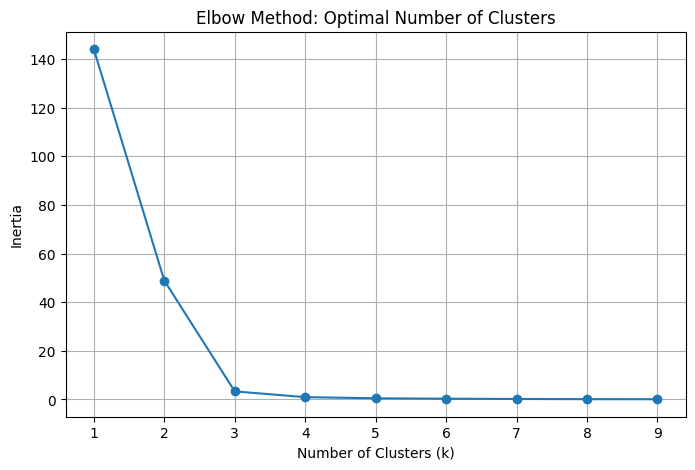

In [ ]:
# Elbow method to determine optimal k
inertia = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

### 🟦 Step 5: Apply KMeans Clustering (k=3)

Based on our elbow analysis and business logic, we proceed with **k = 3** clusters.  
We then assign each state to a cluster and append the label to the original dataset for further analysis and visualization.

Each cluster represents a distinct type of cash-pay healthcare market:
- Cluster 0 → High-Value Boutique
- Cluster 1 → Broad Mass-Market
- Cluster 2 → Outlier-Driven or Unstable

In [ ]:
# Apply KMeans with k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Preview with clusters
df[["State", "Num_Records", "Total_Payment", "Avg_Payment", "Cluster"]]

,State,Num_Records,Total_Payment,Avg_Payment,Cluster
0,AK,8,5754.81,719.351250,0
1,AL,39,66749.89,1711.535641,0
2,AR,5,2609.45,521.890000,0
3,AZ,300,6555135.84,21850.452800,2
4,CA,450,557042.90,1237.873111,0
5,CO,104,215804.86,2075.046731,0
6,CT,14,26273.76,1876.697143,0
7,DC,10,5154.69,515.469000,0
8,DE,2,37.61,18.805000,0
9,FL,268,564367.58,2105.849179,0


### 🟦 Step 6: Analyze Cluster Profiles

We summarize the characteristics of each cluster by computing the average values for:
- `Num_Records`
- `Total_Payment`
- `Avg_Payment`

This helps us **interpret each cluster’s business identity**, allowing us to label them meaningfully:
- Cluster 0 → High-Value Boutique
- Cluster 1 → Broad Mass-Market
- Cluster 2 → Volatile or Outlier-Driven

In [ ]:
# Group by cluster and calculate averages
cluster_summary = df.groupby("Cluster")[["Num_Records", "Total_Payment", "Avg_Payment"]].mean().round(2)
cluster_summary

,Num_Records,Total_Payment,Avg_Payment
Cluster,,,
0,51.54,76101.58,841.41
1,10436.00,39140846.22,3750.56
2,300.00,6555135.84,21850.45


In [ ]:
# Show top 3 states in each cluster by total payment
for i in range(3):
    print(f"\nCluster {i} top states by Total_Payment:")
    display(df[df["Cluster"] == i].sort_values("Total_Payment", ascending=False).head(3)[["State", "Total_Payment", "Avg_Payment"]])


Cluster 0 top states by Total_Payment:


,State,Total_Payment,Avg_Payment
12,IA,600406.71,3143.490628
9,FL,564367.58,2105.849179
4,CA,557042.90,1237.873111



Cluster 1 top states by Total_Payment:


,State,Total_Payment,Avg_Payment
23,MN,39140846.22,3750.560197



Cluster 2 top states by Total_Payment:


,State,Total_Payment,Avg_Payment
3,AZ,6555135.84,21850.4528


### 🟦 Step 7: Visualize Clustered Markets (2D Scatter Plot)

We use a 2D scatter plot to visualize how each state is clustered.  
Each dot represents a state, with:
- X-axis: `Num_Records` (market activity)
- Y-axis: `Avg_Payment` (value per transaction)
- Color: Cluster label

This plot reveals how clusters differ in both **size and value dimension**, providing visual evidence for strategic segmentation.

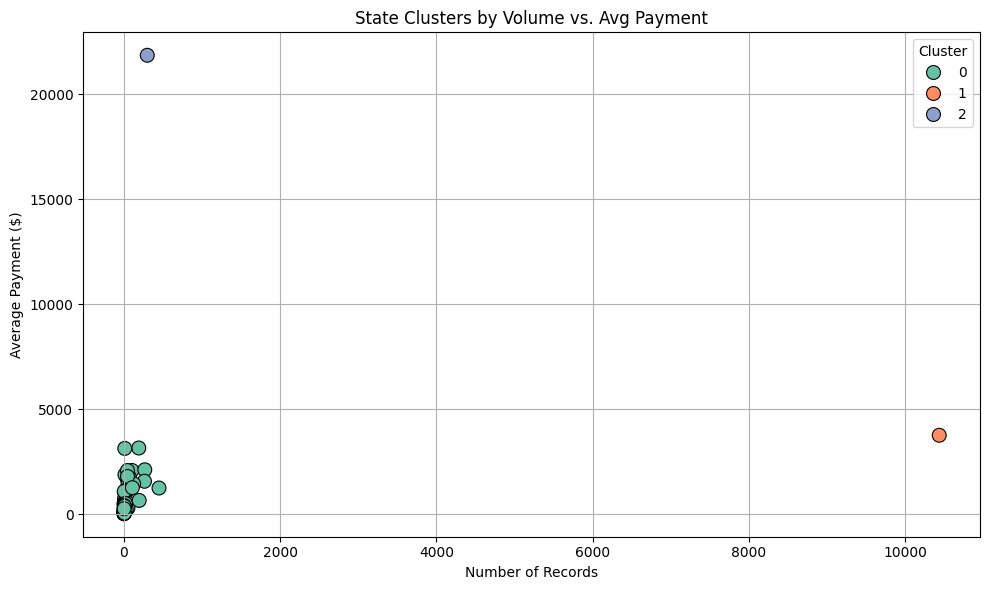

In [ ]:
# Plot scatter by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Num_Records",
    y="Avg_Payment",
    hue="Cluster",
    palette="Set2",
    s=100,
    edgecolor='black'
)
plt.title("State Clusters by Volume vs. Avg Payment")
plt.xlabel("Number of Records")
plt.ylabel("Average Payment ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🟦 Step 8: Choropleth Map — Clustered Market Types Across the U.S.

To visualize geographic trends, we plot a **U.S. map where each state is colored by its cluster**.  
This helps identify regional patterns in cash-pay healthcare markets:

- 🟢 Cluster 0: High-Value Boutique
- 🔵 Cluster 1: Broad Mass-Market
- 🔴 Cluster 2: Outlier-Driven / Volatile

Such spatial patterns can inform **regional expansion strategies** and highlight **where to launch premium vs. mass-market offerings**.

In [ ]:
import plotly.express as px

# Make sure 'State' is in standard two-letter format (should be already)
fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="Cluster",
    color_continuous_scale=px.colors.qualitative.Set2,
    scope="usa",
    title="Clustered Cash-Pay Market Types by State (Plan C)",
    labels={"Cluster": "Market Type Cluster"}
)
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'), title_x=0.5)
fig.show()

## Conclusion

### 🟦 Step 9: Strategic Insight — Interpreting Market Clusters

After applying K-Means clustering, we identified **three distinct state-level market types** in the cash-pay healthcare space:

---

#### 🟢 Cluster 0 — High-Value Boutique Markets
- **Low to medium volume**, but often **high Avg Payment**
- Examples: CO (\\$2,075), CT (\\$1,877), IL (\\$1,560)
- ⚠️ Also includes some **low-activity, low-value** outliers (e.g., MS, SC, ND)

💡 **Interpretation**: A mixed group — includes states that are *either premium candidates* or simply inactive. These require **case-by-case review** before investment.

---

#### 🔵 Cluster 1 — Broad Mass-Market
- **Extremely high volume** and strong **total payment**
- Key state: **MN (Minnesota)** with 10,436 transactions and \$39M+ paid  
- Moderate Avg Payment (~\$3,750)

💡 **Interpretation**: These are **true workhorse states**, with structural demand and sufficient spend. Ideal for **broad reach campaigns and scalable cash-pay offerings**.

---

#### 🔴 Cluster 2 — Outlier-Driven / Premium Spike
- Small number of states, but with **extreme Avg Payment**
- Example: **AZ (Arizona)** with 300 records, but Avg Payment **$21,850**

💡 **Interpretation**: Markets in this cluster are **highly premium**, possibly driven by a few specialized providers. Great for **premium product launches**, but require **validation of stability**.

---

### 🧠 Strategic Summary for Healium:

| Cluster | Market Type         | Strategic Action                                 |
|---------|---------------------|--------------------------------------------------|
| 0       | Boutique / Unclear  | Segment internally, pilot premium if validated  |
| 1       | Broad Mass-Market   | Prioritize for large-scale go-to-market rollout |
| 2       | Premium Outliers    | Targeted campaigns for luxury / concierge care  |

---

> Clustering reveals not just “how big” a state’s market is — but “**what kind**” of opportunity it represents. This enables nuanced strategy across volume, value, and volatility dimensions.